In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
n = 4
arboles = f'../labs/arboles_1000_head.csv'
regresion = f'../runs/run_{n}/regression_{n}_head.csv'
normal = f'../runs/run_{n}/normalizaded_{n}_head.csv'
result = f'../runs/run_{n}/calculo_bio_car_{n}_head.csv'
#/home/gomosak/conafor/SEByc/runs/run_15/regression_15_head.csv /home/gomosak/conafor/SEByc/runs/run_15/calculo_bio_car_15_head.csv

In [4]:
df = pd.read_csv(arboles)

In [5]:
biomasa_eq = pd.read_csv(regresion)

In [6]:
nor = pd.read_csv(normal)

In [7]:
re = pd.read_csv(result)

In [8]:
re[re.altura == 0]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono


In [9]:
re[re.diametro == 0]


,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono


In [12]:
re[["familia","genero","epiteto","altura","diametro","biomasa","carbono"]][re.biomasa > 2000]

,familia,genero,epiteto,altura,diametro,biomasa,carbono
475,Pinaceae,Pinus,jeffreyi,20.0,89.2,3498.204241,1712.720796
478,Pinaceae,Pinus,jeffreyi,27.4,74.0,3314.123297,1622.594766
612,Pinaceae,Pinus,jeffreyi,23.7,62.3,2113.930736,1034.980488
620,Pinaceae,Pinus,jeffreyi,29.2,57.2,2188.813381,1071.643031
623,Pinaceae,Pinus,jeffreyi,29.1,71.4,3279.766788,1605.773819
...,...,...,...,...,...,...,...
1304426,Pinaceae,Pinus,oocarpa,20.0,68.1,2130.094894,1042.894460
1305100,Rhizophoraceae,Rhizophora,mangle,25.0,45.7,2192.212231,986.495504
1305101,Rhizophoraceae,Rhizophora,mangle,25.0,43.8,2028.134199,912.660390
1305102,Rhizophoraceae,Rhizophora,mangle,25.0,46.0,2218.648311,998.391740


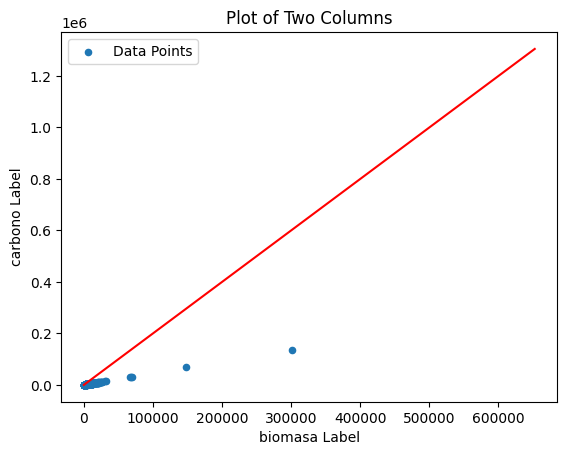

In [13]:
x = re.plot(kind='scatter', x='biomasa', y='carbono', label='Data Points')

# Now, use matplotlib's plot and axhline directly
# Plot the line x = y
plt.plot([x / 2 for x in range(len(df))],range(len(df)), color='red', label='x = y')

# Plot the line x = y
#ax.plot(range(1000),range(1000), color='red', label='x = y')
# Add labels and title
plt.xlabel('biomasa Label')
plt.ylabel('carbono Label')
plt.title('Plot of Two Columns')
plt.show()


In [15]:
re[re.biomasa/re.carbono > 3000]

,id,anio_levantamiento,conglomerado,sitio,condicion,especie_id,familia,genero,epiteto,categoria_infra,infraespecie,numero_arbol,numero_tallo,tallos,diametro,altura,is_predicted,latitud,longitud,clave_ecoregion_n2,clave_bur,referencia_1,referencia_2,user_id,created_at,updated_at,grado_putrefaccion,clave_ecoregion_n1,clave_ecoregion_n3,clave_ecoregion_n4,estado_inegi,estado,edad,carbon_eq,biomasa_eq,densidad_eq,volumen_eq,volumen,biomasa,carbono


In [23]:
re[["condicion","familia","genero","epiteto","altura","diametro","biomasa","carbono","is_predicted","biomasa_eq"]][re.biomasa > 6000]


,condicion,familia,genero,epiteto,altura,diametro,biomasa,carbono,is_predicted,biomasa_eq
1420,Vivo,Pinaceae,Pinus,jeffreyi,32.0,96.8,6261.807759,3065.781079,0.0,(0.058)*((([d130]**2)*[ht])**0.919)
1423,Vivo,Pinaceae,Pinus,lambertiana,31.0,123.4,6874.641042,3365.824254,0.0,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...
33129,Vivo,Cupressaceae,Juniperus,deppeana,6.2,315.0,10711.415918,5141.479641,0.0,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...
75817,Vivo,Oleaceae,Fraxinus,NaN,8.9,1407.0,301040.239424,135468.107741,0.0,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...
123686,Vivo,Fagaceae,Quercus,rugosa,31.6,96.7,7353.807215,3382.751319,0.0,(0.283)*((([d130]**2)*[ht])**0.807)
...,...,...,...,...,...,...,...,...,...,...
1300006,Vivo,Moraceae,Ficus,aurea,21.0,196.0,12993.986292,5597.809295,0.0,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...
1300427,Vivo,Sapotaceae,Manilkara,zapota,27.0,109.7,10213.286764,4891.143031,0.0,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...
1301781,Vivo,Moraceae,Ficus,costaricana,20.0,167.0,9377.968657,4040.028898,0.0,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...
1301823,Vivo,Moraceae,Brosimum,alicastrum,32.0,93.5,7085.261685,3194.035968,0.0,(Exp(-2.187+(0.916*(LOG(([p])*(([d130])**2)*([...
